In [5]:
import inspect
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, '../' * 2)

from settings import DATA_PATH

In [2]:
RESULTS_PATH = DATA_PATH / 'results' / 'results.csv'

In [3]:
df = pd.read_csv(RESULTS_PATH, sep=';')
df['Resize + Crop'] = df.apply(lambda row: f"{row['Target shape']} + {row['Center crop']}", axis=1)
df

Dataset          Model Center crop Target shape  Accuracy  Precision  \
0        Subset  Random Forest        None    (176, 96)      0.35       0.33   
1        Subset  Random Forest   (100,100)     (176,96)      0.37       0.35   
2        Subset  Random Forest    (84, 84)     (176,96)      0.36       0.34   
3        Subset  Random Forest  (100, 100)         None      0.38       0.36   
4        Subset  Random Forest    (84, 84)         None      0.37       0.35   
5        Subset       AdaBoost  (100, 100)         None      0.30       0.28   
6   All classes  Random Forest  (100, 100)         None      0.15       0.12   
7   All classes       AdaBoost  (100, 100)         None      0.12       0.08   
8   All classes            KNN  (100, 100)         None      0.04       0.06   
9   All classes     SVM Linear  (100, 100)         None      0.05       0.07   
10  All classes  Random Forest    (84, 84)         None      0.16       0.12   
11  All classes       AdaBoost    (84, 84)         None      0.11       0.08   
12  All classes            KNN    (84, 84)         None      0.05       0.08   
13  All classes     SVM Linear    (84, 84)         None      0.06       0.06   
14  All classes  Random Forest  (100, 100)    (176, 96)      0.16       0.13   
15  All classes  Random Forest  (100, 100)         None      0.29       0.26   
16  All classes  Random Forest    (84, 84)         None      0.26       0.24   
17       Subset  Random Forest  (100, 100)         None      0.62       0.61   
18       Subset        SVM RBF  (100, 100)         None      0.64       0.63   
19       Subset       AdaBoost  (100, 100)         None      0.48       0.46   
20       Subset        SVM RBF  (100, 100)         None      0.39       0.40   

    Recall    F1      Features           Resize + Crop  
0     0.35  0.33         HOGPH        (176, 96) + None  
1     0.37  0.35         HOGPH    (176,96) + (100,100)  
2     0.36  0.34         HOGPH     (176,96) + (84, 84)  
3     0.37  0.36         HOGPH       None + (100, 100)  
4     0.37  0.35         HOGPH         None + (84, 84)  
5     0.30  0.26         HOGPH       None + (100, 100)  
6     0.12  0.10         HOGPH       None + (100, 100)  
7     0.09  0.06         HOGPH       None + (100, 100)  
8     0.04  0.03         HOGPH       None + (100, 100)  
9     0.05  0.04         HOGPH       None + (100, 100)  
10    0.13  0.11         HOGPH         None + (84, 84)  
11    0.09  0.06         HOGPH         None + (84, 84)  
12    0.05  0.03         HOGPH         None + (84, 84)  
13    0.05  0.04         HOGPH         None + (84, 84)  
14    0.12  0.11         HOGPH  (176, 96) + (100, 100)  
15    0.26  0.26  Optical flow       None + (100, 100)  
16    0.24  0.23  Optical flow         None + (84, 84)  
17    0.61  0.61  Optical flow       None + (100, 100)  
18    0.64  0.63  Optical flow       None + (100, 100)  
19    0.48  0.46  Optical flow       None + (100, 100)  
20    0.40  0.37         HOGPH       None + (100, 100)

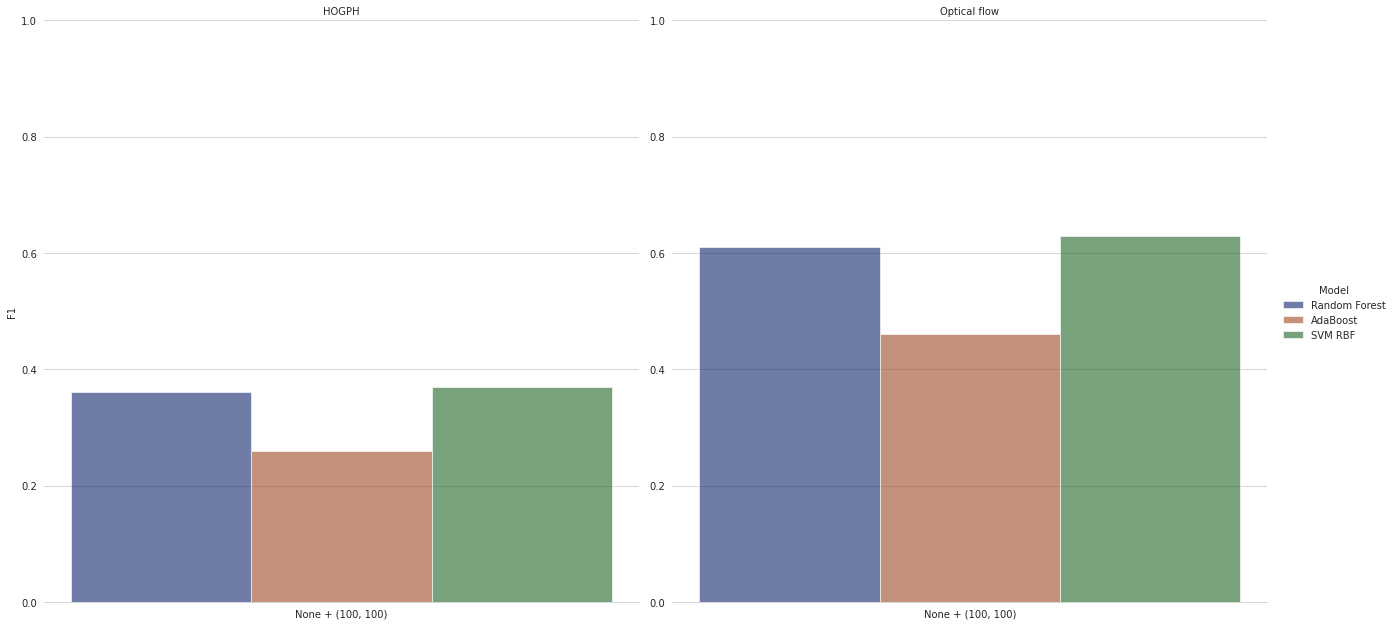

In [6]:
df_sub = df[df['Dataset'] == 'Subset'].copy()
df_sub = df_sub[df_sub['Resize + Crop'] == 'None + (100, 100)']

sns.set_style("whitegrid")

g = sns.catplot(
    data=df_sub, kind="bar",
    x="Resize + Crop", y="F1", hue="Model",
    ci=None, palette="dark", alpha=.6, height=9,
    orient='v', col="Features", sharey=False
)

(g.set_axis_labels("", "F1")
  .set_titles("{col_name}")
  .set(ylim=(0, 1))
  .despine(left=True))

g._legend.set_title('Model')

plt.savefig('subsetbest.png', dpi=200)


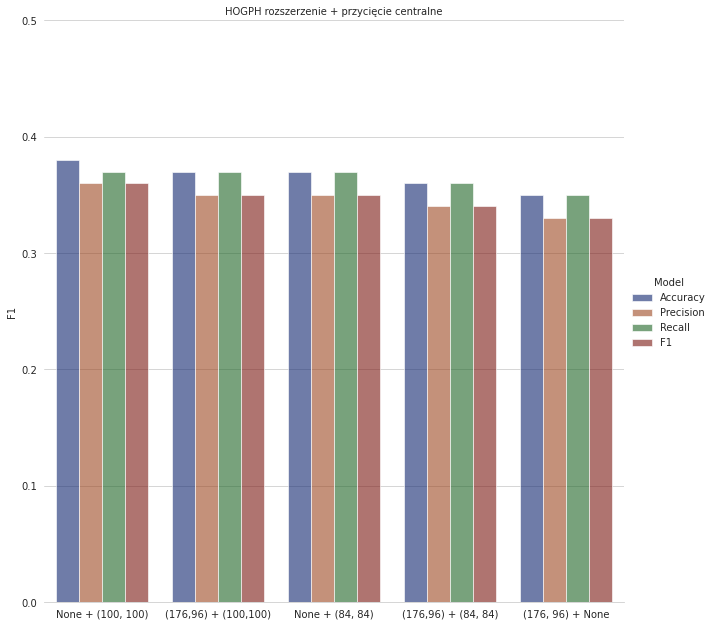

In [23]:
df_sub = df[df['Dataset'] == 'Subset'].copy()
df_sub = df_sub[(df_sub['Features'] == 'HOGPH') & (df_sub['Model'] == 'Random Forest')].sort_values(by='F1', ascending=False)
df_sub = pd.melt(df_sub, id_vars=['Dataset', 'Model', 'Center crop', 'Target shape', 'Resize + Crop', 'Features'],
                 value_vars=['Accuracy', 'Precision', 'Recall', 'F1'])
df_sub
sns.set_style("whitegrid")

g = sns.catplot(
    data=df_sub, kind="bar",
    x="Resize + Crop", y="value", hue="variable",
    ci=None, palette="dark", alpha=.6, height=9,
    orient='v', col="Features", sharey=False
)

(g.set_axis_labels("", "F1")
  .set_titles("{col_name} rozszerzenie + przycięcie centralne")
  .set(ylim=(0, 0.5))
  .despine(left=True)
  .set_xticklabels(rotation=0))

g._legend.set_title('Model')

plt.savefig('subsethog.png', dpi=200)

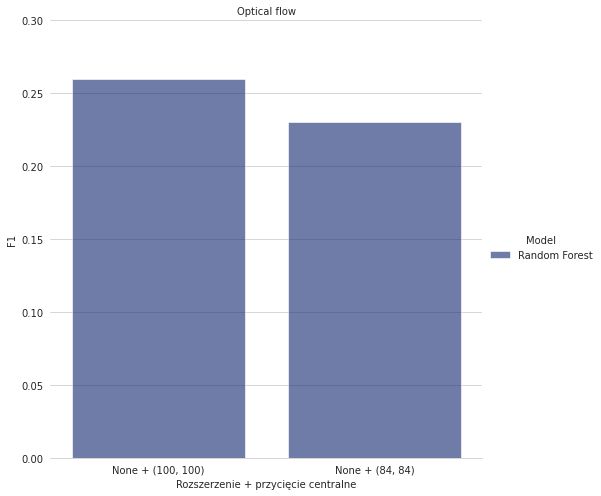

In [21]:
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

df_2 = df[df['Dataset'] == 'All classes'].copy()
# df_2 = df_2[df_2['Resize + Crop'] != '(176, 96) + (100, 100)']
df_2 = df_2[df_2['Features'] == 'Optical flow']

g = sns.catplot(
    data=df_2, kind="bar",
    x="Resize + Crop", y="F1", hue="Model",
    ci=None, palette="dark", alpha=.6, height=7,
    orient='v', col='Features', sharey=False
)

(g.set_axis_labels("Rozszerzenie + przycięcie centralne", "F1")
  .set_titles("{col_name}")
  .set(ylim=(0, 0.3))
  .despine(left=True))

g._legend.set_title('Model')

plt.savefig('all.png', dpi=200)